<a href="https://colab.research.google.com/github/Atharva-D/Detection-and-Prediction-of-Diabetes/blob/main/SVM_FINAL1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [79]:
%%R
install.packages("caret")
library(caret)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/caret_6.0-90.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 2335088 bytes (2.2 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[writ

In [ ]:
%%R
data<-read.csv("/content/drive/MyDrive/Data science/diabetes.csv")
str(data)

'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 0 1 1 ...


In [80]:
%%R
head(data)

  Pregnancies Glucose BloodPressure SkinThickness Insulin  BMI
1           1      85            66            29       0 26.6
2           5     116            74             0       0 25.6
3          10     115             0             0       0 35.3
4           4     110            92             0       0 37.6
5          10     139            80             0       0 27.1
6           1     103            30            38      83 43.3
  DiabetesPedigreeFunction Age Outcome
1                    0.351  31       0
2                    0.201  30       0
3                    0.134  29       0
4                    0.191  30       0
5                    1.441  57       0
6                    0.183  33       0


In [82]:
%%R
set.seed(3033)
intrain <- createDataPartition(y = data$Outcome, p= 0.7, list = FALSE)
training <- data[intrain,]
testing <- data[-intrain,]

In [83]:
%%R
install.packages("groupdata2")
library(groupdata2)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/groupdata2_2.0.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1288014 bytes (1.2 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[

In [84]:
%%R
training<-upsample(
  training,
  "Outcome",
  id_col = NULL,
  id_method = "n_ids",
  mark_new_rows = FALSE,
  new_rows_col_name = ".new_row"
)

In [86]:
%%R
dim(training)


[1] 490   9


In [87]:
%%R
dim(testing)

[1] 210   9


In [88]:
%%R
summary(data)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.:102.0   1st Qu.: 64.00   1st Qu.: 0.00  
 Median : 3.000   Median :122.0   Median : 72.00   Median :24.00  
 Mean   : 4.203   Mean   :125.7   Mean   : 69.28   Mean   :20.78  
 3rd Qu.: 7.000   3rd Qu.:148.0   3rd Qu.: 80.00   3rd Qu.:33.00  
 Max.   :17.000   Max.   :199.0   Max.   :114.00   Max.   :99.00  
    Insulin            BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.00   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.00   1st Qu.:28.65   1st Qu.:0.2477           1st Qu.:25.00  
 Median :  0.00   Median :32.90   Median :0.3970           Median :31.00  
 Mean   : 84.35   Mean   :33.21   Mean   :0.4914           Mean   :34.25  
 3rd Qu.:135.00   3rd Qu.:37.70   3rd Qu.:0.6585           3rd Qu.:41.00  
 Max.   :846.00   Max.   :67.10   Max.   :2.4200           Max.   :72.00  
 Outco

In [90]:
%%R
trctrl <- trainControl(method = "repeatedcv", number = 10, repeats = 3)
set.seed(3233)
svm_Linear <- train(Outcome ~., data = training, method = "svmLinear",
                 trControl=trctrl,
                 preProcess = c("center", "scale"),
                 tuneLength = 10)
svm_Linear

Support Vector Machines with Linear Kernel 

490 samples
  8 predictor
  2 classes: '0', '1' 

Pre-processing: centered (8), scaled (8) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 442, 441, 440, 441, 442, 441, ... 
Resampling results:

  Accuracy   Kappa    
  0.7641916  0.5281203

Tuning parameter 'C' was held constant at a value of 1


In [91]:
%%R
 test_pred <- predict(svm_Linear, newdata = testing)
 test_pred
 

  [1] 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1
 [38] 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0
 [75] 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1
[112] 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1
[149] 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1
[186] 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1
Levels: 0 1


In [92]:
%%R
data$Outcome <- as.factor(data$Outcome)
table(data$Outcome)


  0   1 
350 350 


In [93]:
%%R
test_pred<-predict(svm_Linear,testing)

In [94]:
%%R
confusionMatrix(test_pred,testing$Outcome)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 81 31
         1 24 74
                                          
               Accuracy : 0.7381          
                 95% CI : (0.6731, 0.7962)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : 1.622e-12       
                                          
                  Kappa : 0.4762          
                                          
 Mcnemar's Test P-Value : 0.4185          
                                          
            Sensitivity : 0.7714          
            Specificity : 0.7048          
         Pos Pred Value : 0.7232          
         Neg Pred Value : 0.7551          
             Prevalence : 0.5000          
         Detection Rate : 0.3857          
   Detection Prevalence : 0.5333          
      Balanced Accuracy : 0.7381          
                                          
       'Positive' Class : 0               
                                    

In [95]:
%%R
grid <- expand.grid(C = c(0,0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2,5))
set.seed(3233)
svm_Linear_Grid <- train(Outcome ~., data = training, method = "svmLinear",
                    trControl=trctrl,
                    preProcess = c("center", "scale"),
                    tuneGrid = grid,
                    tuneLength = 10)
 
svm_Linear_Grid


Support Vector Machines with Linear Kernel 

490 samples
  8 predictor
  2 classes: '0', '1' 

Pre-processing: centered (8), scaled (8) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 442, 441, 440, 441, 442, 441, ... 
Resampling results across tuning parameters:

  C     Accuracy   Kappa    
  0.00        NaN        NaN
  0.01  0.7668849  0.5333933
  0.05  0.7649546  0.5296220
  0.10  0.7648577  0.5294721
  0.25  0.7661910  0.5321615
  0.50  0.7676077  0.5349717
  0.75  0.7642052  0.5281606
  1.00  0.7641916  0.5281203
  1.25  0.7648719  0.5294939
  1.50  0.7648719  0.5294939
  1.75  0.7648719  0.5294939
  2.00  0.7648719  0.5294939
  5.00  0.7648719  0.5294939

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was C = 0.5.


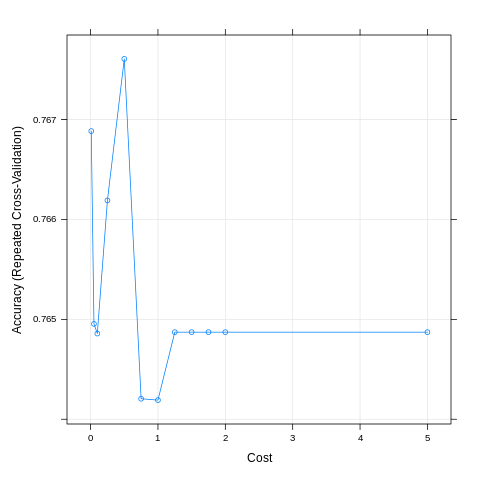

In [96]:
%%R
plot(svm_Linear_Grid)

In [97]:
%%R
test_pred_grid <- predict(svm_Linear_Grid, newdata = testing)
test_pred_grid

  [1] 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1
 [38] 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0
 [75] 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1
[112] 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1
[149] 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1
[186] 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1
Levels: 0 1


In [98]:
%%R
confusionMatrix(test_pred_grid,testing$Outcome )

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 81 31
         1 24 74
                                          
               Accuracy : 0.7381          
                 95% CI : (0.6731, 0.7962)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : 1.622e-12       
                                          
                  Kappa : 0.4762          
                                          
 Mcnemar's Test P-Value : 0.4185          
                                          
            Sensitivity : 0.7714          
            Specificity : 0.7048          
         Pos Pred Value : 0.7232          
         Neg Pred Value : 0.7551          
             Prevalence : 0.5000          
         Detection Rate : 0.3857          
   Detection Prevalence : 0.5333          
      Balanced Accuracy : 0.7381          
                                          
       'Positive' Class : 0               
                                    

In [99]:
%%R
set.seed(3233)
svm_Radial <- train(Outcome ~., data = training, method = "svmRadial",
  trControl=trctrl,
  preProcess = c("center", "scale"),
  tuneLength = 10)
svm_Radial

Support Vector Machines with Radial Basis Function Kernel 

490 samples
  8 predictor
  2 classes: '0', '1' 

Pre-processing: centered (8), scaled (8) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 442, 441, 440, 441, 442, 441, ... 
Resampling results across tuning parameters:

  C       Accuracy   Kappa    
    0.25  0.7621468  0.5239959
    0.50  0.7661315  0.5319804
    1.00  0.7701871  0.5400933
    2.00  0.7659938  0.5317657
    4.00  0.7687568  0.5372508
    8.00  0.7666610  0.5330877
   16.00  0.7638832  0.5274974
   32.00  0.7686740  0.5370793
   64.00  0.7593016  0.5184308
  128.00  0.7435249  0.4870200

Tuning parameter 'sigma' was held constant at a value of 0.1309725
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.1309725 and C = 1.


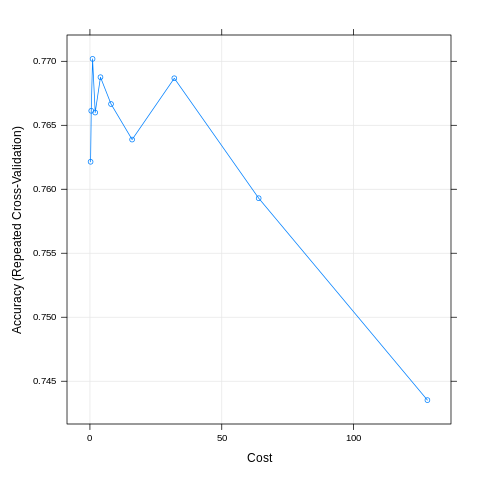

In [100]:
%%R
plot(svm_Radial)


In [101]:
%%R
test_pred_Radial <- predict(svm_Radial, newdata = testing)
confusionMatrix(test_pred_Radial, testing$Outcome )

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 81 25
         1 24 80
                                          
               Accuracy : 0.7667          
                 95% CI : (0.7035, 0.8221)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : 1.987e-15       
                                          
                  Kappa : 0.5333          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.7714          
            Specificity : 0.7619          
         Pos Pred Value : 0.7642          
         Neg Pred Value : 0.7692          
             Prevalence : 0.5000          
         Detection Rate : 0.3857          
   Detection Prevalence : 0.5048          
      Balanced Accuracy : 0.7667          
                                          
       'Positive' Class : 0               
                                    

In [104]:
%%R
grid_radial <- expand.grid(sigma = c(0,0.01, 0.02, 0.025, 0.03, 0.04,
 0.05, 0.06, 0.07,0.08, 0.09, 0.1, 0.25, 0.5, 0.75,0.9),
 C = c(0,0.01, 0.05, 0.1, 0.25, 0.5, 0.75,
 1, 1.5, 2,5))
set.seed(3233)
svm_Radial_Grid <- train(Outcome ~., data = training, method = "svmRadial",
                    trControl=trctrl,
                    preProcess = c("center", "scale"),
                    tuneGrid = grid_radial,
                    tuneLength = 10)

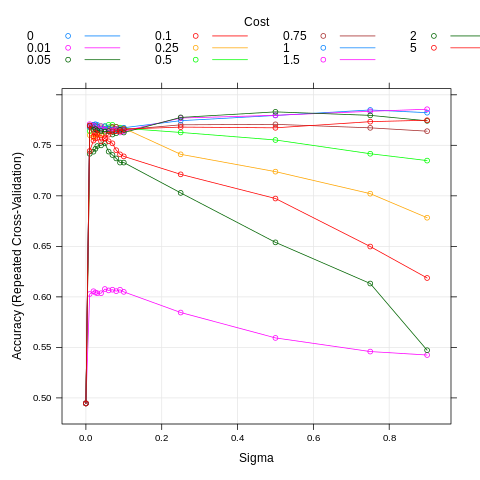

In [105]:
%%R
plot(svm_Radial_Grid)

In [107]:
%%R
 svm_Radial_Grid

Support Vector Machines with Radial Basis Function Kernel 

490 samples
  8 predictor
  2 classes: '0', '1' 

Pre-processing: centered (8), scaled (8) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 442, 441, 440, 441, 442, 441, ... 
Resampling results across tuning parameters:

  sigma  C     Accuracy   Kappa     
  0.000  0.00        NaN         NaN
  0.000  0.01  0.4945578  0.00000000
  0.000  0.05  0.4945578  0.00000000
  0.000  0.10  0.4945578  0.00000000
  0.000  0.25  0.4945578  0.00000000
  0.000  0.50  0.4945578  0.00000000
  0.000  0.75  0.4945578  0.00000000
  0.000  1.00  0.4945578  0.00000000
  0.000  1.50  0.4945578  0.00000000
  0.000  2.00  0.4945578  0.00000000
  0.000  5.00  0.4945578  0.00000000
  0.010  0.00        NaN         NaN
  0.010  0.01  0.6028078  0.21650000
  0.010  0.05  0.7415833  0.48373642
  0.010  0.10  0.7443339  0.48835271
  0.010  0.25  0.7601077  0.51983119
  0.010  0.50  0.7641774  0.52796202
  0.010  0.75  0.76

In [106]:
%%R
test_pred_Radial_Grid <- predict(svm_Radial_Grid, newdata = testing)
confusionMatrix(test_pred_Radial_Grid, testing$Outcome)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 83 15
         1 22 90
                                          
               Accuracy : 0.8238          
                 95% CI : (0.7654, 0.8728)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.6476          
                                          
 Mcnemar's Test P-Value : 0.3239          
                                          
            Sensitivity : 0.7905          
            Specificity : 0.8571          
         Pos Pred Value : 0.8469          
         Neg Pred Value : 0.8036          
             Prevalence : 0.5000          
         Detection Rate : 0.3952          
   Detection Prevalence : 0.4667          
      Balanced Accuracy : 0.8238          
                                          
       'Positive' Class : 0               
                                    